In [60]:
import numpy as np
import pandas as pd
import cv2 
import glob
import os, sys
import imageio
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score

from google.colab.patches import cv2_imshow

In [61]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/Data.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/content/Data")

In [62]:
training_img_path = '/content/Data/Data/Train/'
list_of_images_training = []
for i in range(1,2401): 
    im_path = training_img_path + '{}.jpg'.format(i)
    im = imageio.imread(str(im_path))
    im_numpy = np.array(im)
    im_numpy_flatten = im_numpy.flatten().reshape(1,784)
    list_of_images_training.append(im_numpy_flatten)	


list_of_images_training_np = np.array(list_of_images_training).reshape(2400,784)
print(list_of_images_training_np.shape) 

(2400, 784)


In [63]:
TestLabels= np.genfromtxt("/content/Test Labels.txt", delimiter = ",")
TestLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [64]:
list_of_images_training_np[990]

array([  6,   1,   0,   0,   0,   5,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   4,   0,   0,   2,   0,   0,   4,   1,   0,   0,
         0,   0,   0,   7,  13,   0,   0,   0,   2,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   3,   2,   0,
         0,   0,   0,   0,   5,   0,   0,   0,   9,   6,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  10,   5,   5,   8,   5,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
        10,   1,   0,   2,   0,   0,   0,   0,   0,   2,   1,   0,   0,
         8,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,
         2,   0,   4,   7,   1,   0,   0,   0,   0,   0,   9,   6,   7,
         8,   4,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,  10,   0,   0,   0,   5,   0,   0,   0,   0,   0,   0,
         0,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,   

In [65]:
testing_img_path = '/content/Data/Data/Test/'
list_of_images_testing = []
for i in range(1,201): 
    im_path = testing_img_path + '{}.jpg'.format(i)
    im = imageio.imread(str(im_path))
    im_numpy = np.array(im)
    im_numpy_flatten = im_numpy.flatten().reshape(1,784)
    list_of_images_testing.append(im_numpy_flatten)	


list_of_images_testing_np = np.array(list_of_images_testing).reshape(200,784)
print(list_of_images_testing_np.shape) 

(200, 784)


In [66]:
list_of_images_training_np.shape

(2400, 784)

In [67]:
def getMean1(number):
  total=np.zeros(shape=(784))
  i=0
  StartingIndexOfOnes= number * 240
  for i in range (240):
    total= list_of_images_training_np[i+StartingIndexOfOnes]+total
  mean1= total/240
  return mean1


In [68]:
(getMean1(0).reshape(1,784)).shape

(1, 784)

In [69]:
def getMean2(number):
  total=np.zeros(shape=(784))
  i=0
  total2=0
  StartingIndexOfOnes= number * 240
  for i in range (2400):
    if(StartingIndexOfOnes <= i < StartingIndexOfOnes+240):
      total2= total2*1
    else:
      total= list_of_images_training_np[i]+total

  mean2= total/2160
  return mean2

In [70]:
getMean2(0).shape

(784,)

In [71]:
def getClass1(number):
  c=[]
  i=0
  startingIndex= number * 240
  for i in range (240):
    c.append(list_of_images_training_np[i+startingIndex])
  c=np.array(c)
  return c      

In [72]:
def getClass2(number):
  c=[]
  i=0
  startingIndex= number * 240
  total2=0
  for i in range (2400):
    if(startingIndex <= i < startingIndex+240):
      total2= total2*1
    else:
      c.append(list_of_images_training_np[i])
  c=np.array(c)
  return c    

In [73]:
def getS1(image1,mean1):
  i=0
  s1= np.zeros((784,784))
  
  for i in range(240):
    s11= (image1[i]- mean1 ).reshape(784,1)
    s12= (image1[i]- mean1).transpose().reshape(1,784);
    s1+= s11.dot(s12)
  return s1  

def getS2(image2,mean2):  
  j=0
  s2= np.zeros((784,784))
  for j in range(2160):
    s21= (image2[j]- mean2  ).reshape(784,1)
    s22= (image2[j]- mean2 ).transpose().reshape(1,784);
    s2+=s21.dot(s22)
  return s2

def getSw(number):
  k=0
  Sw=np.zeros((784,784))
  Sw= getS1( getClass1(number),getMean1(number) )+ getS2( getClass2(number),getMean2(number) ) 
  return Sw  

In [74]:
sw0= getSw(0)
sw1= getSw(1)
sw2= getSw(2)
sw3= getSw(3)
sw4= getSw(4)
sw5= getSw(5)
sw6= getSw(6)
sw7= getSw(7)
sw8= getSw(8)
sw9= getSw(9)



In [84]:
W0=np.linalg.pinv(sw0).dot( getMean2(0)-getMean1(0) )
W1=np.linalg.pinv(sw1).dot( getMean2(1)-getMean1(1) )
W2=np.linalg.pinv(sw2).dot( getMean2(2)-getMean1(2) )
W3=np.linalg.pinv(sw3).dot( getMean2(3)-getMean1(3) )
W4=np.linalg.pinv(sw4).dot( getMean2(4)-getMean1(4) )
W5=np.linalg.pinv(sw5).dot( getMean2(5)-getMean1(5) )
W6=np.linalg.pinv(sw6).dot( getMean2(6)-getMean1(6) )
W7=np.linalg.pinv(sw7).dot( getMean2(7)-getMean1(7) )
W8=np.linalg.pinv(sw8).dot( getMean2(8)-getMean1(8) )
W9=np.linalg.pinv(sw9).dot( getMean2(9)-getMean1(9) )

W00= -0.5*W0.transpose().dot( getMean2(0)+getMean1(0) )
W01= -0.5*W1.transpose().dot( getMean2(1)+getMean1(1) )
W02= -0.5*W2.transpose().dot( getMean2(2)+getMean1(2) )
W03= -0.5*W3.transpose().dot( getMean2(3)+getMean1(3) )
W04= -0.5*W4.transpose().dot( getMean2(4)+getMean1(4) )
W05= -0.5*W5.transpose().dot( getMean2(5)+getMean1(5) )
W06= -0.5*W6.transpose().dot( getMean2(6)+getMean1(6) )
W07= -0.5*W7.transpose().dot( getMean2(7)+getMean1(7) )
W08= -0.5*W8.transpose().dot( getMean2(8)+getMean1(8) )
W09= -0.5*W9.transpose().dot( getMean2(9)+getMean1(9) )



In [76]:
PredictedLabels=[]
for i in range (200):
  #WT*x
  #WT*X+W0
  yOfX0= np.dot(W0.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX1= np.dot(W1.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX2= np.dot(W2.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX3= np.dot(W3.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX4= np.dot(W4.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX5= np.dot(W5.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX6= np.dot(W6.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX7= np.dot(W7.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX8= np.dot(W8.T,list_of_images_testing_np[i].reshape(784,1))
  yOfX9= np.dot(W9.T,list_of_images_testing_np[i].reshape(784,1))

  minY=np.array([yOfX0[0],yOfX1[0],yOfX2[0],yOfX3[0],yOfX4[0],yOfX5[0],yOfX6[0],yOfX7[0],yOfX8[0],yOfX9[0]])
  minPredIndex= np.argmin(minY)
  PredictedLabels.append(minPredIndex)

In [77]:
PredictedLabels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 8,
 2,
 1,
 2,
 2,
 2,
 4,
 3,
 2,
 3,
 2,
 1,
 5,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 5,
 4,
 4,
 8,
 9,
 4,
 6,
 3,
 8,
 4,
 9,
 8,
 5,
 8,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 8,
 6,
 5,
 8,
 5,
 9,
 3,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 7,
 7,
 2,
 7,
 9,
 7,
 7,
 7,
 7,
 3,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 7,
 9,
 7,
 7,
 7,
 3,
 3,
 9,
 3,
 4,
 9,
 9,
 9,
 7,
 9,
 9,
 0,
 9,
 9]

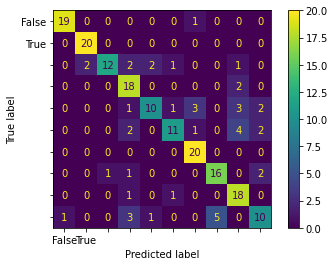

<Figure size 432x288 with 0 Axes>

In [78]:
from sklearn import metrics

cm = metrics.confusion_matrix(TestLabels, PredictedLabels)
cm
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.savefig('ConfusionMatrix.png')

In [79]:
# How to calculate the accuracy?
accuracy_score(TestLabels,PredictedLabels)

0.77

In [80]:
PredictedLabelsBiased=[]
for i in range (200):
  #WT*x
  #WT*X+W0
  yOfX0= np.dot(W0.T,list_of_images_testing_np[i].reshape(784,1))+W00
  yOfX1= np.dot(W1.T,list_of_images_testing_np[i].reshape(784,1))+W01
  yOfX2= np.dot(W2.T,list_of_images_testing_np[i].reshape(784,1))+W02
  yOfX3= np.dot(W3.T,list_of_images_testing_np[i].reshape(784,1))+W03
  yOfX4= np.dot(W4.T,list_of_images_testing_np[i].reshape(784,1))+W04
  yOfX5= np.dot(W5.T,list_of_images_testing_np[i].reshape(784,1))+W05
  yOfX6= np.dot(W6.T,list_of_images_testing_np[i].reshape(784,1))+W06
  yOfX7= np.dot(W7.T,list_of_images_testing_np[i].reshape(784,1))+W07
  yOfX8= np.dot(W8.T,list_of_images_testing_np[i].reshape(784,1))+W08
  yOfX9= np.dot(W9.T,list_of_images_testing_np[i].reshape(784,1))+W09

  minY=np.array([yOfX0[0],yOfX1[0],yOfX2[0],yOfX3[0],yOfX4[0],yOfX5[0],yOfX6[0],yOfX7[0],yOfX8[0],yOfX9[0]])
  minPredIndex= np.argmin(minY)
  PredictedLabelsBiased.append(minPredIndex)



In [81]:
PredictedLabelsBiased

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 4,
 3,
 2,
 3,
 2,
 1,
 5,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 9,
 8,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 9,
 8,
 6,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 7,
 9,
 2,
 7,
 9,
 7,
 7,
 7,
 7,
 3,
 8,
 5,
 8,
 9,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 8,
 8,
 8,
 5,
 9,
 7,
 9,
 7,
 7,
 9,
 3,
 5,
 9,
 9,
 4,
 9,
 9,
 9,
 9,
 9,
 9,
 0,
 9,
 9]

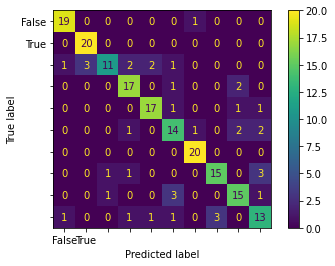

<Figure size 432x288 with 0 Axes>

In [82]:
from sklearn import metrics

cm = metrics.confusion_matrix(TestLabels, PredictedLabelsBiased)
cm
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.savefig('ConfusionMatrixBiased.png')

In [83]:
# How to calculate the accuracy?
accuracy_score(TestLabels,PredictedLabelsBiased)

0.805

The biased fisher LDA is better than the normal fisher LDA as the accuracy is higher 0.77 and 0.805 respectedly